# Digit Recognition with CNN

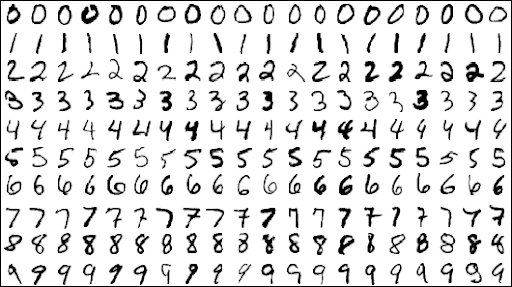

1. [Convolutional Neural Network](#1)
2. [Libraries and Utilities](#2)
3. [Loading Data](#3)
4. [Visualization](#4)
5. [Preprocessing](#17)
    - [Normalization](#5)
    - [Reshaping](#6)
    - [Label Encoding](#7)
8. [Train Test Split](#8)
9. [Implementing with Keras](#9)
10. [Define Optimizer](#10)
11. [Compile Model](#11)
12. [Epochs and Batch Size](#12)
13. [Data Augmentation](#13)
14. [Fit the Model](#14)
15. [Evaluate the Model](#15)
16. [Confusion Matrix](#16)

<a id = "1"></a>
# Convolutional Neural Network

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on the shared-weight architecture of the convolution kernels that scan the hidden layers and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, Image segmentation, medical image analysis, natural language processing, brain-computer interfaces, and financial time series.

CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include varying the weights as the loss function gets minimized while randomly trimming connectivity. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble patterns of increasing complexity using smaller and simpler patterns embossed in the filters. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.

Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.

CNNs use relatively little pre-processing compared to other image classification algorithms. This means that the network learns to optimize the filters or convolution kernels that in traditional algorithms are hand-engineered. This independence from prior knowledge and human intervention in feature extraction is a major advantage.

<a id = "2"></a>
# Libraries and Utilities

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


<a id = "3"></a>
# Loading Data

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1)
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

<a id = "4"></a>
# Visualization

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

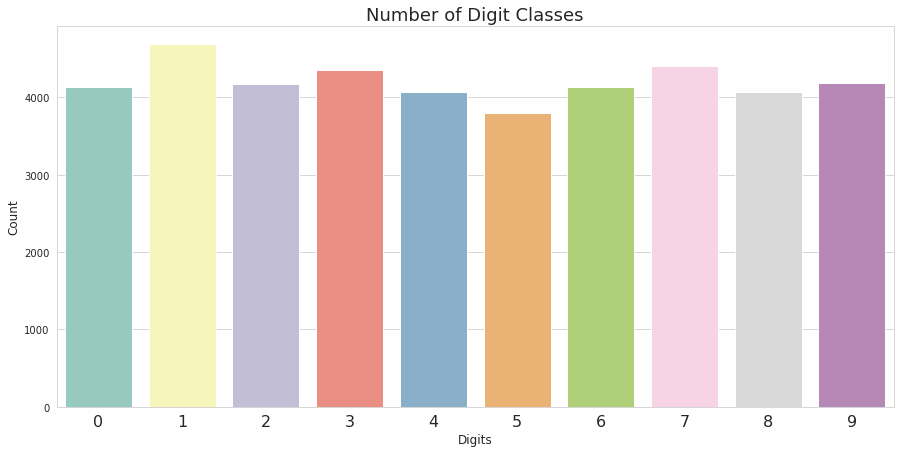

In [5]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette = 'Set3')
plt.title("Number of Digit Classes", size = 18)
plt.xticks(size = 16)
plt.xlabel("Digits", size = 12)
plt.ylabel("Count", size =12)
Y_train.value_counts()

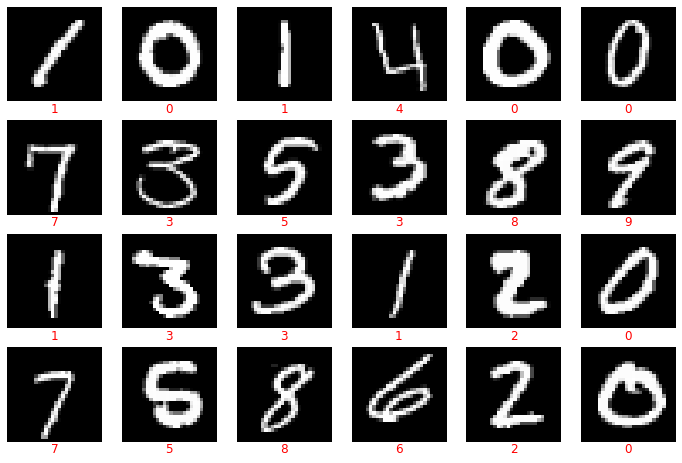

In [6]:
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_train.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.title(str(Y_train[i]), y=-0.18,color="red")
plt.show()

<a id = "17"></a>
# Preprocessing

<a id = "5"></a>
## Normalization
We perform a grayscale normalization to reduce the effect of illuminations differences.

In [7]:
X_train = X_train / 255.0
test = test / 255.0
print("X_train Shape: ",X_train.shape)
print("Test Shape: ",test.shape)

X_train Shape:  (42000, 784)
Test Shape:  (28000, 784)


<a id = "6"></a>
## Reshaping

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape: ",X_train.shape)
print("Test Shape: ",test.shape)

X_train Shape:  (42000, 28, 28, 1)
Test Shape:  (28000, 28, 28, 1)


<a id = "7"></a>
## Label Encoding

In [9]:
Y_train = to_categorical(Y_train, num_classes = 10)

<a id = "8"></a>
# Train Test Split

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (29400, 28, 28, 1)
x_test shape (12600, 28, 28, 1)
y_train shape (29400, 10)
y_test shape (12600, 10)


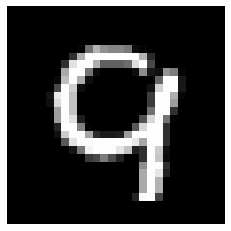

In [11]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.axis("off")
plt.show()

<a id = "9"></a>
# Implementing with Keras

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.

In [12]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id = "10"></a>
# Define Optimizer
We can change the learning rate with Adam Optimizer.

In [13]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

<a id = "11"></a>
# Compile Model

In [14]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id = "12"></a>
# Epochs and Batch Size
Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [15]:
epochs = 20
batch_size = 250

<a id = "13"></a>
# Data Augmentation
We need to expand artificially our handwritten digit datase to avoid overfitting problem. Alter the training data with small transformations to reproduce the variations of digit.

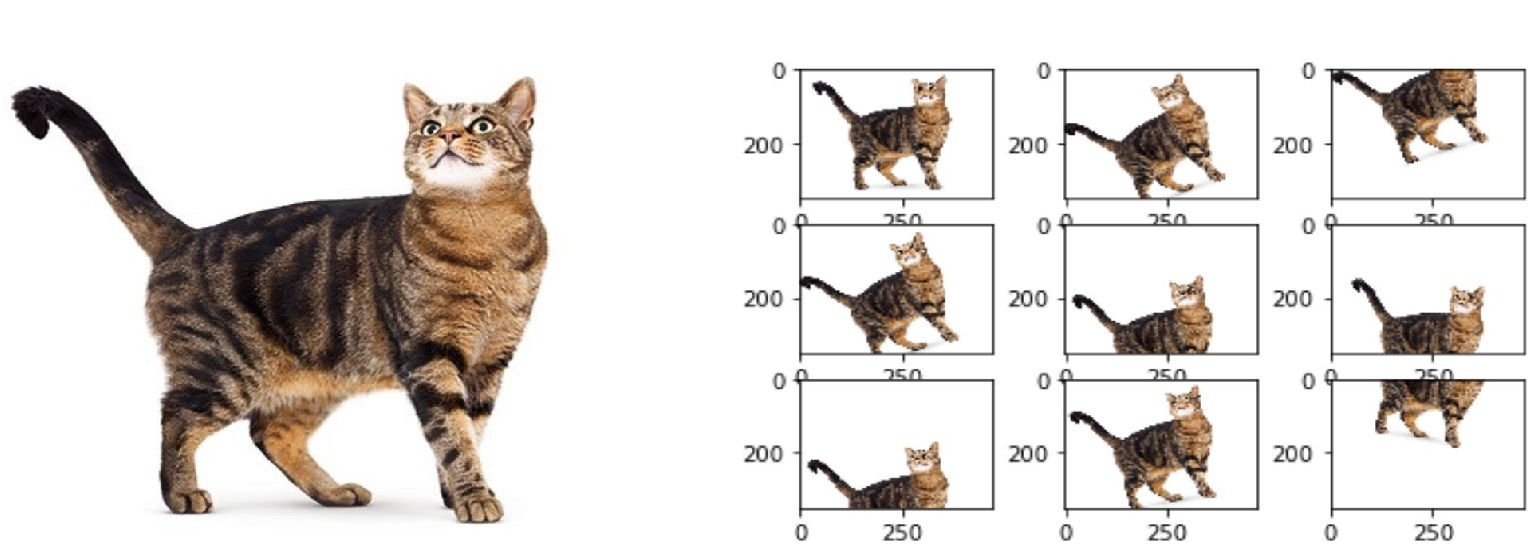

In [16]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,rotation_range=5,
                             zoom_range = 0.1,width_shift_range=0.1,
                             height_shift_range=0.1,horizontal_flip=False,
                             vertical_flip=False)
datagen.fit(X_train)

<a id = "14"></a>
# Fit the Model

In [17]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/20
117/117 [==============================] - 14s 115ms/step - loss: 1.7434 - accuracy: 0.3894 - val_loss: 0.2839 - val_accuracy: 0.9321
Epoch 2/20
117/117 [==============================] - 13s 110ms/step - loss: 0.6096 - accuracy: 0.8036 - val_loss: 0.1542 - val_accuracy: 0.9577
Epoch 3/20
117/117 [==============================] - 13s 111ms/step - loss: 0.3996 - accuracy: 0.8764 - val_loss: 0.1125 - val_accuracy: 0.9679
Epoch 4/20
117/117 [==============================] - 13s 108ms/step - loss: 0.3252 - accuracy: 0.8972 - val_loss: 0.0956 - val_accuracy: 0.9723
Epoch 5/20
117/117 [==============================] - 13s 110ms/step - loss: 0.2786 - accuracy: 0.9124 - val_loss: 0.0869 - val_accuracy: 0.9756
Epoch 6/20
117/117 [==============================] - 13s 109ms/step - loss: 0.2538 - accuracy: 0.9226 - val_loss: 0.0743 - val_accuracy: 0.9784
Epoch 7/20
117/117 [==============================] - 13s 107ms/step - loss: 0.2331 - accuracy: 0.9264 - val_loss: 0.0665 - val_ac

<a id = "15"></a>
# Evaluate the Model

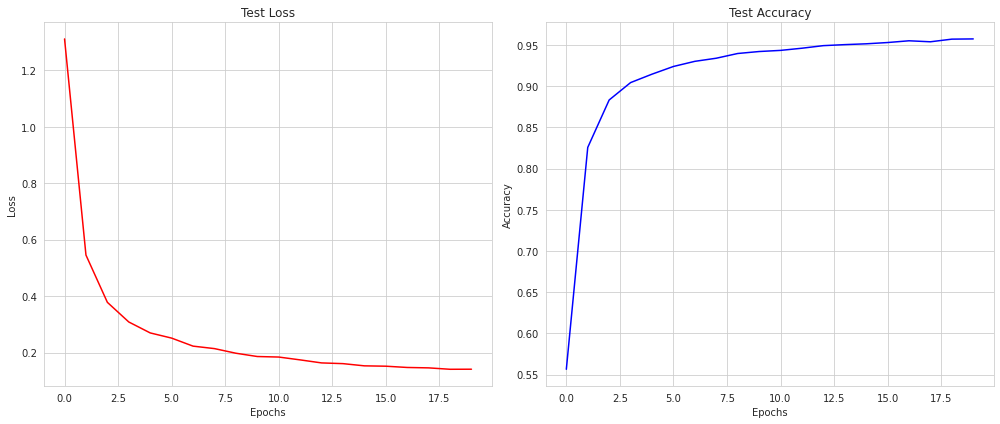

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
ax1.plot(history.history['loss'], color='r', label="Loss")
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='b', label="Accuracy")
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

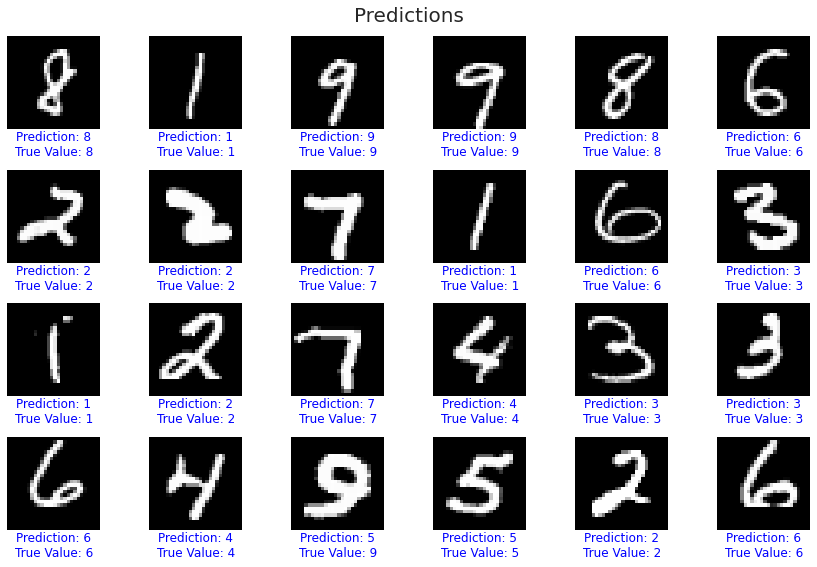

In [19]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="blue")
f.tight_layout()
    
f.show()


In [20]:
wrong_index = []
for i in range(2400):
    if Y_pred_classes[i] != Y_true[i]:
        wrong_index.append(i)
print(len(wrong_index))

34


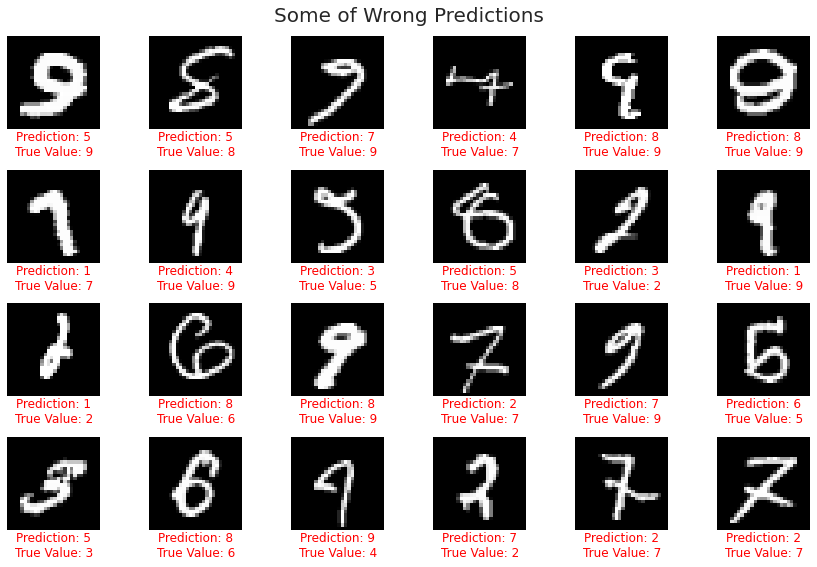

In [21]:
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Some of Wrong Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = X_val[wrong_index[i]]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[wrong_index[i]],
                                                      Y_true[wrong_index[i]]),y=-0.35,color="red")
f.tight_layout()
    
f.show()

<a id = "16"></a>
# Confusion Matrix

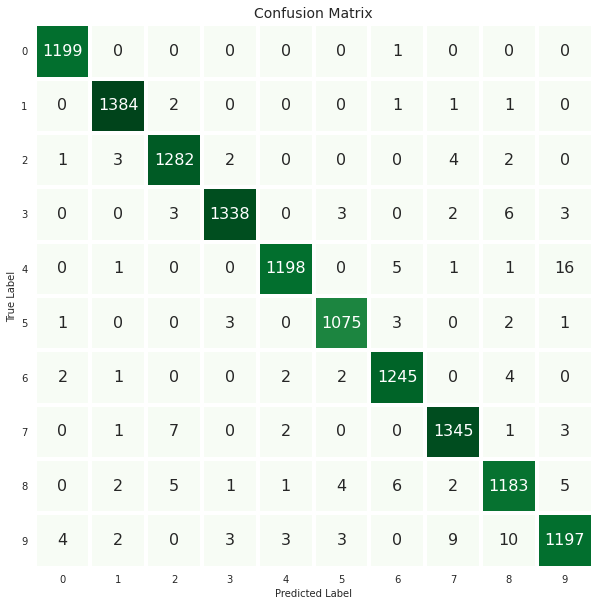

In [22]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="Greens",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()